
#  Training Complex CNN architectures.

We will build and train a convolutional network on CIFAR-10 dataset. We will use popular Lenet architecture.



Load all the necessary packages

In [1]:
import numpy as np
import os
import keras
import matplotlib
from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Train on CIFAR-10 dataset

#### Load CIFAR 10 dataset.

CIFAR-10 is the widely used dataset in deep learning community to benchmark, validate and evaluate any new findings.
CIFAR-10 dataset contains around 60k images belonging to 10 classes. It contains 50k training and 10k test images. The dataset is available at http://www.cs.toronto.edu/~kriz/cifar.html . Please visit the webpage to know more about the dataset.




In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:")
print( "Number of examples: ", X_train.shape[0])
print( "Number of channels:",X_train.shape[3] )
print( "Image size:", X_train.shape[1], X_train.shape[2])
print("\n")
print( "Test data:")
print( "Number of examples:", X_test.shape[0])
print( "Number of channels:", X_test.shape[3])
print( "Image size:",X_test.shape[1], X_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32


Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


#### Visualize some images from CIFAR-10 dataset. 
It contains 10 classes namely, airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

(288, 320, 3) 255 0


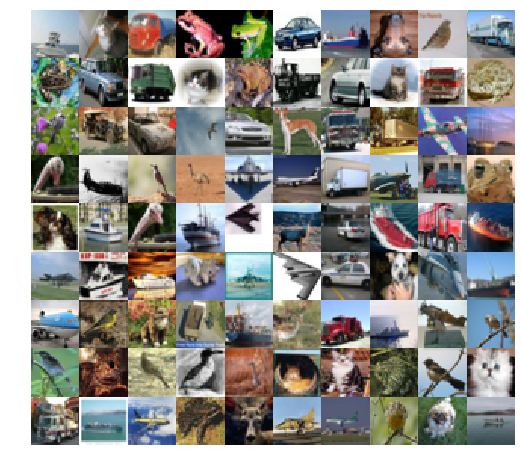

In [3]:
plot = []
for i in range(1,10):
    plot_image = X_train[100*i,:,:,:]
    for j in range(1,10):
        plot_image = np.concatenate((plot_image, X_train[100*i+j,:,:,:]), axis=1)
    if i==1:
        plot = plot_image
    else:
        plot = np.append(plot, plot_image, axis=0)
print(plot.shape, np.max(plot), np.min(plot))
plt.imshow(plot/255)
plt.axis('off')
plt.show()

#### Normalize the data.

In [5]:
print("mean before normalization:", np.mean(X_train)) 
print("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print("mean after normalization:", np.mean(X_train))
print("std after normalization:", np.std(X_train))

mean before normalization: 4.91799193961621e-17
std before normalization: 0.9999999999999996
mean after normalization: 2.077449323678593e-17
std after normalization: 1.0000000000000002


#### Specify Training Parameters

In [0]:
batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows, img_cols = 32, 32       #-- input image dimensions

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

#### Lets build a CNN network (LeNet) in Theano Keras and train on CIFAR-10 dataset.

In [31]:
def build_model():
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems
  return model

model= build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_186 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_187 (Activation)  (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 400)               0         
__________

#### Compile and then train the network

In [32]:
sgd = SGD(lr=learningRate)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 235us/step - loss: 2.2757 - acc: 0.1522 - val_loss: 2.2337 - val_acc: 0.1854
Epoch 2/10
50000/50000 [==============================] - 10s 202us/step - loss: 2.1628 - acc: 0.2213 - val_loss: 2.0711 - val_acc: 0.2517
Epoch 3/10
16950/50000 [=========>....................] - ETA: 6s - loss: 2.0381 - acc: 0.263250000/50000 [==============================] - 10s 204us/step - loss: 1.9754 - acc: 0.2894 - val_loss: 1.8917 - val_acc: 0.3220
Epoch 4/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.8511 - acc: 0.3376 - val_loss: 1.8086 - val_acc: 0.3578
Epoch 5/10
40700/50000 [=======================>......] - ETA: 1s - loss: 1.7893 - acc: 0.359650000/50000 [==============================] - 10s 205us/step - loss: 1.7834 - acc: 0.3611 - val_loss: 1.7482 - val_acc: 0.3762
Epoch 6/10
50000/50000 [==============================] - 10s 205us/step - loss: 1.7276 -

#### Print the scores

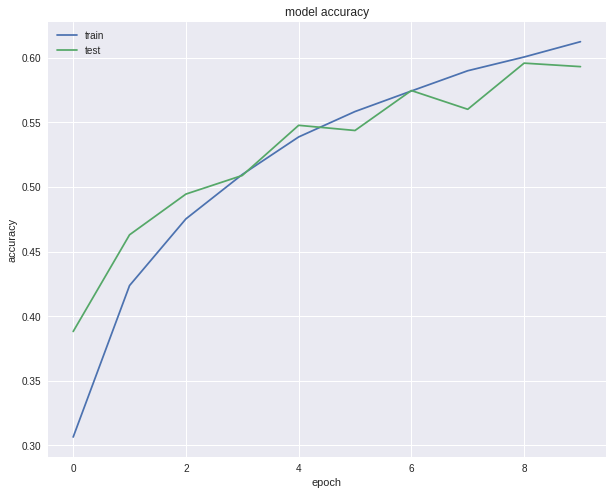

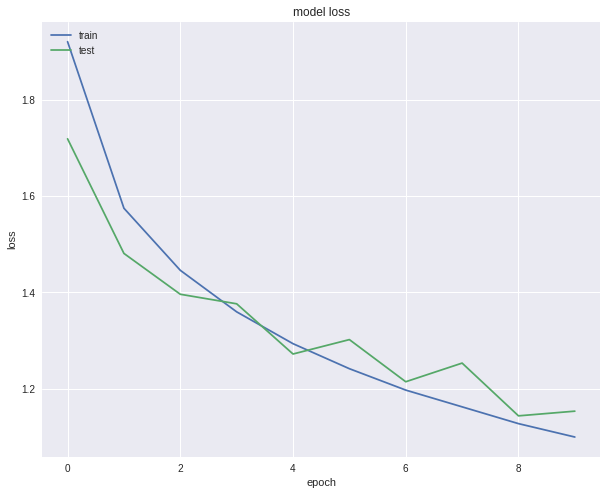

In [9]:
#-- summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#-- summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
CS698

In [10]:
#-- test the network
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1537069120407104
Test accuracy: 0.5931


#### save the model

In [0]:
#cifar10_weights = model.get_weights()
#np.savez("cifar10_weights_new", cifar10_weights = cifar10_weights)

** Q1: [0.5 point] **

What are the number of parameters in convolution layers with K filters each of size 3*w*h.

** Answer 1 **

If the input has n channels,
*   Weights for each filter = 3 x 3 x n
*   Bias for each filter = 1
*   Total params for K filters = K x (3 x 3 x n + 1)



**Q2: [0.5 points]**

What are the number of parameters in a max pooling operation?

**Answer 2**

None


**Q3: [0.5 point]**

Which of the operations contain most number of parameters?
      (a) conv (b) pool (c) Fully connected layer (FC) (d) Relu 
      
**Answer 3**

In general, number of params depend upon the size of Conv or Fully Connected Layer. So it is difficult to answer this question without exact numbers.
However, One of the main reasons of introduction of Conv Layers other than achieving translational invariance, is to improve computational efficiency while preserving spatial relationships by enabling parameter sharing. 

In that context, Fully Connected Layers would contain most number of parameters as they donot have any kind of parameter sharing and compute linear transformation for all of the input at one go. 


**Q4: [0.5 point]**

Which operation consume most amount of memory?
     (a) initial convolution layers (b) fully connected layers at the end
     
**Answer 4**

Since Fully Connected Layers contains hold number of parameters, they consume most amount of memory.

**Q5: [2 points]**

Experiment with learning rate (learningRate) and notice the behaviour of the learning process. Plot your observations in a graph with brief explanation. Take the values on a log scale. Vary only one parameter at a time.

#### Experiments with learning rate:

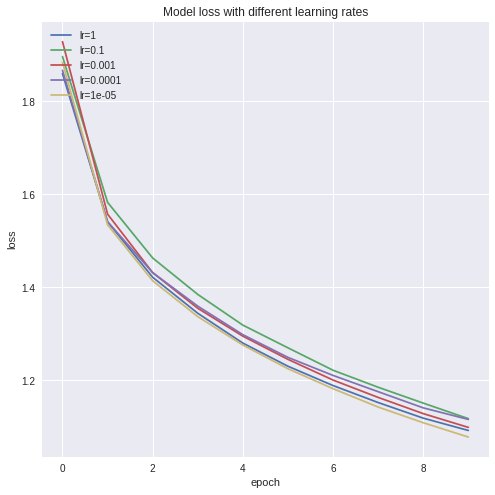

In [11]:
# Generate learning rates between 1-0.00001 at logspace
learning_rates = [1, 0.1, 0.001, 0.0001, 0.00001]
# Train and output graphs for each of the learning rates
legends = []
plt.figure(figsize=(8, 8))
for learning_rate in learning_rates:
  model = build_model()

  # Train the network
  sgd = SGD(lr=learningRate)
  model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))


  # Plot learning loss 
  plt.plot(history.history['loss'])
  plt.title('Model loss with different learning rates')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  legends.append('lr={}'.format(learning_rate))
  
plt.legend(legends, loc='upper left')
plt.show()
  
 

**Answer 6**

As we can see from the above graph, higher learning rates lead to faster convergence but at the same time they have tendency to overshoot the minima, evident from the zig-zag form of the loss curve for higher learning rates.

**Q6: [2 points]**

Currently, the batch-size is 50. Notice the training loss curve if batch size is changed to 1. Is it smooth or fluctating? Show the effect of batch-size on the learning curves in a plot. Take the values on a log scale. Vary only one parameter at a time.

#### Experiment with batch sizes

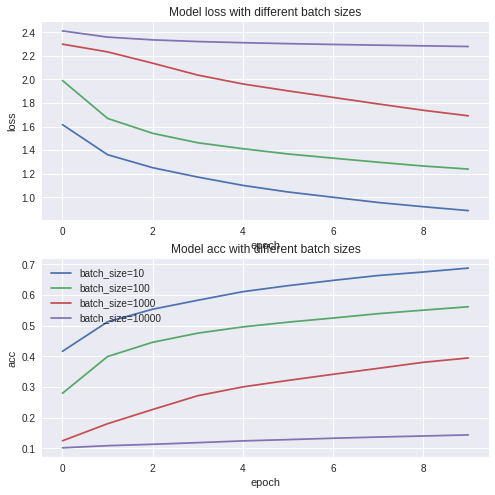

In [24]:
batch_sizes = [10, 100, 1000, 10000]
# Train and output graphs for each of the learning rates
legends = []
plt.figure(figsize=(8, 8))
for batch_size in batch_sizes:
  model = build_model()

  # Train the network
  sgd = SGD(lr=learningRate)
  model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))


  # Plot learning loss 
  plt.subplot(2,1,1)
  plt.plot(history.history['loss'])
  plt.title('Model loss with different batch sizes')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  
  plt.subplot(2,1,2)
  plt.plot(history.history['acc'])
  plt.title('Model acc with different batch sizes')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  legends.append('batch_size={}'.format(batch_size))
   
plt.legend(legends, loc='upper left')
plt.show()

**Answer 7**

As evident from the loss curves above, smaller batches lead to slower training times but finer losses and better accuracy. Bigger batches train faster but they need more training epochs and data to reach the same level of accuracy as the smaller batches. Bigger batches act as regulariser in case of overfitting as well. 

In [0]:
def plot_model_history(history):
  """
  Utility function to plot model loss and accuracy
  """
  #-- summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  #-- summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

** Q7: [2 points] **

Increase the **number of convolution filters** and experiment. Present your observations using plots and brief explanations.
Take the values on a log scale. Vary only one parameter at a time.

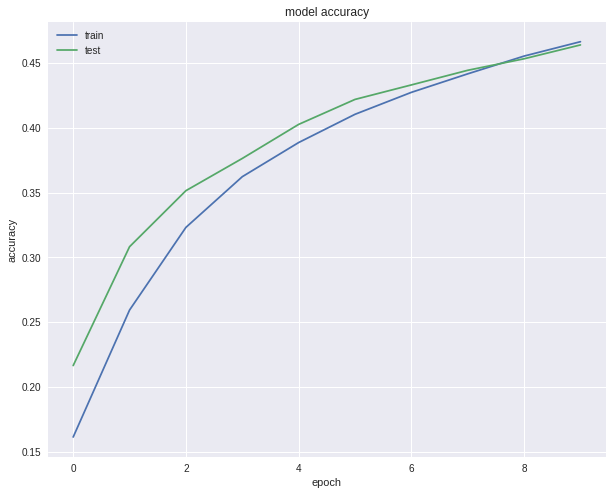

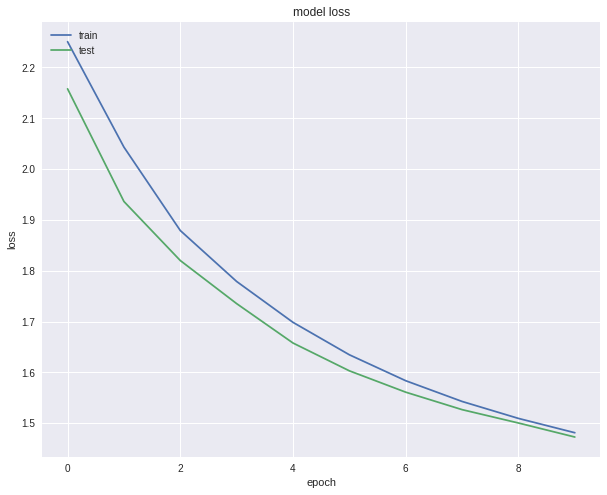

In [34]:
#Experiment 1 :  Increase the number of convolutions filters at first layer
def build_model_2():
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(12, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems
  return model


batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001

model= build_model_2()
sgd = SGD(lr=learningRate)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))
plot_model_history(history)

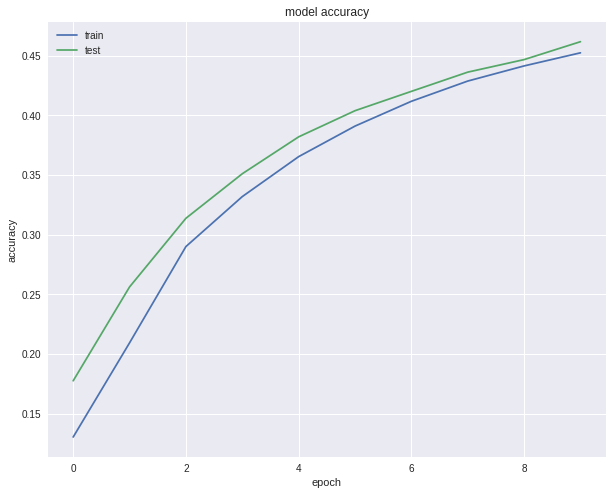

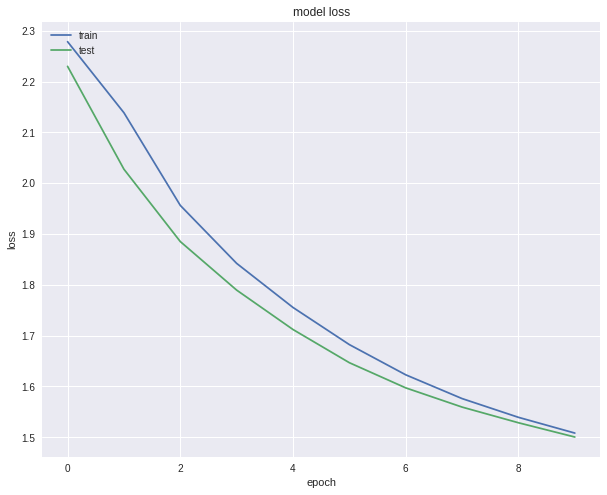

In [35]:
#Experiment 2 :  Increase the number of convolutions filters at second layer
def build_model_3():
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  
  model.add(Convolution2D(24, 5, 5))                                  #-- 24 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems
  return model

batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001

model= build_model_2()
sgd = SGD(lr=learningRate)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))
plot_model_history(history)

** Answer 7 **

In both the cases, as evident from the accuracy and loss curve, adding filters to the convolutional layer had made model more expressive leading to better generalisaton and as a result better accuracy than the first model on validation set. 

** Q8: [2 points] **

What do you observe if you increase the **number of layers** (depth of the network) ? Present your observations using plots and brief explanations. 

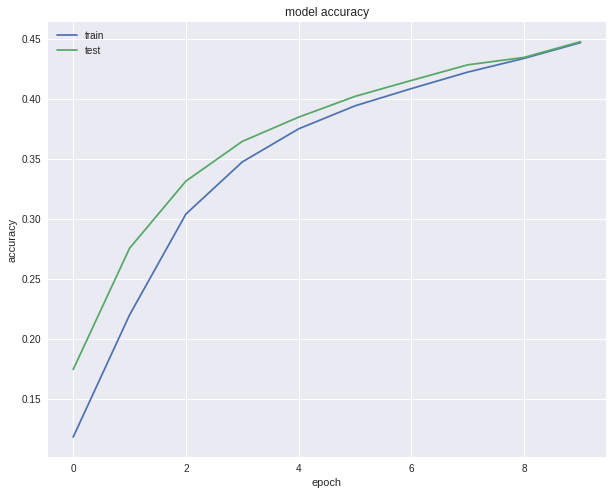

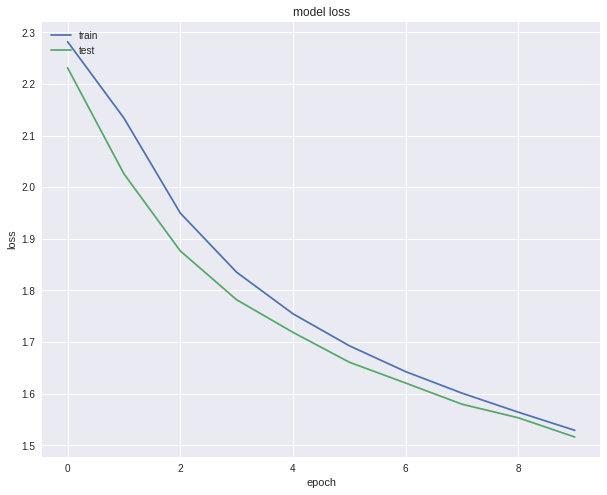

In [36]:
#Experiment 3 :  Changing activation function 
def build_model_4():
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('tanh'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('tanh'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  
  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems
  return model

batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001

model= build_model_2()
sgd = SGD(lr=learningRate)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))
plot_model_history(history)

** Answer 8 **


As evident from the accuracy and loss curve, this case also closely follows the earlier one, i.e adding convolutional layer had made model more expressive leading to better generalisaton and as a result better accuracy than the first model on validation set.  However, adding a large number of Conv layers while keeping the same training epochs and learning rate would lead to underfitting of data. At the same time, training more epochs with a complex model would lead to memorisation of data. 

** Q9: [2 points] **

What do you observe if you increase the **activation functions** (tanh, relu, sigmoid) ? Present your observations using plots and brief explanations.

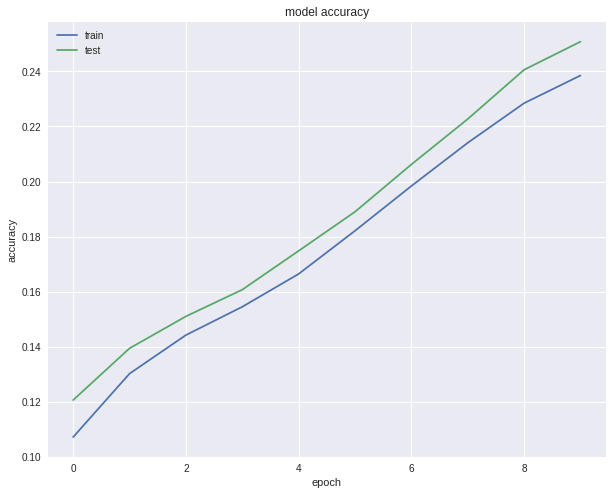

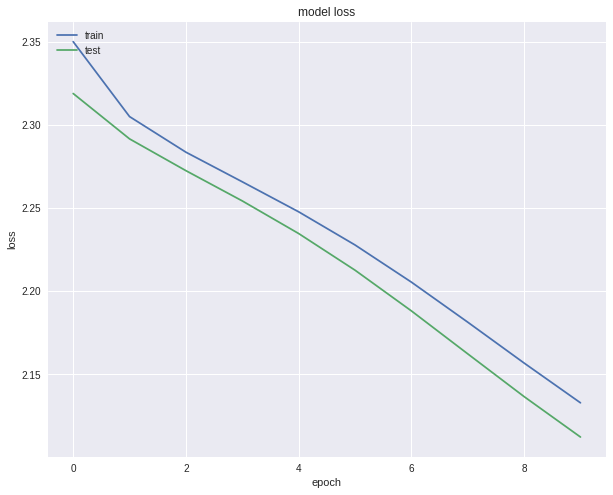

In [29]:
#Experiment 3 :  Increase the number of convolution layers 
def build_model_4():
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Convolution2D(24, 5, 5))                                  #-- 24 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Convolution2D(32, 5, 5))                                  #-- 32 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems
  return model

batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001

model= build_model_2()
sgd = SGD(lr=learningRate)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=0, shuffle=True, validation_data=(X_test, Y_test))
plot_model_history(history)

** Answer 9**

As evident from the above graphs, accuracy for the model is much better with ReLu activation. It also trains quite faster than relu.

** Q10: [1 points] **

CNN training requires lot of training data. In the absence of large training data, a common practice is to use synthetic data using operations such as flipping, scaling, etc. Can you think of any other two operations techniques that can help to increase the training set? Demonstrate these effects with sufficient explanation.

** Answer 10**

Apart from flipping and scaling operations, we can generate synthetic data by
- Applying perspective transfromations(Affine Tranformations like rotation, sheering etc)
- Applying random shadowing to parts of image and cropping some part of it 


```
This code is a modified version of the code from Deep-Learning School which took place at IIIT-Hyd in Summers 2017 and Summers 2016
```
